In [30]:
# univariate cnn lstm example
from numpy import array
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
from pandas import read_csv
from math import sqrt


# split a univariate sequence into samples

def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def train_test (n_steps_in, n_steps_out, propTrainTest, dataset):
    
    n_steps_in, n_steps_out = n_steps_in, n_steps_out
    # split train test
    X, y = split_sequence(dataset, n_steps_in, n_steps_out)
    
    train_size = int(len(X) * propTrainTest)
    test_size = len(dataset) - train_size
    train_X, test_X = X[0:train_size,:], X[train_size:len(X),:]
    train_Y, test_Y = y[0:train_size,:], y[train_size:len(y),:]
    
    return (train_X, test_X, train_Y, test_Y)

# fixem random seed
np.random.seed(7)

dadesBaells = read_csv('dadesSau.csv', sep=';',header=0, index_col=0)
dataframe = pd.DataFrame(dadesBaells.loc[dadesBaells.index >= '2009-01-01']['Volum'])
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normalitzem

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset = [item for sublist in dataset for item in sublist]

n_steps_in = 17
n_steps_out = 1
propTrainTest = 0.8
train_X, test_X, train_Y, test_Y = train_test(n_steps_in, n_steps_out, propTrainTest, dataset)

In [31]:
# Fit regression model
model = SVR(kernel='rbf', C=75, epsilon=0.003)
model.fit(train_X, train_Y)
testPredict = model.predict(test_X)

c:\users\manel\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
test_YR = scaler.inverse_transform(test_Y)
test_XR = scaler.inverse_transform(test_X)
testPredict = np.array(testPredict).reshape((testPredict.shape[0], 1)) 
testPredict = scaler.inverse_transform(testPredict)

def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculem RMSE per cada dia
    for i in range(actual.shape[1]):
        # calculem MSE
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculem RMSE
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calcul global de RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

RMSE_TOT, RMSE_days = evaluate_forecasts(test_YR,testPredict)
print(RMSE_TOT)


0.8687361558679497


In [34]:
input_x = test_X[0]
resultatsf = []
resultatsp = []
for j in range (695):
    for i in range (15):
        input_x = array(input_x).reshape((1, 17))
        predict = model.predict(input_x)
        resultatsp.append((predict, test_Y[j+i]))
        input_x = np.delete(input_x, 0)
        input_x = np.append(input_x, predict)
    resultatsf.append(resultatsp)
    input_x = test_X[j]
    resultatsp = []
    

In [36]:
       
dia1 = []
dia2 = []
dia3 = []
dia4 = []
dia5 = []
dia6 = []
dia7 = []
dia8 = []
dia9 = []
dia10 = []
dia11 = []
dia12 = []
dia13 = []
dia14 = []
dia15 = []

test1 = []
test2 = []
test3 = []
test4 = []
test5 = []
test6 = []
test7 = []
test8 = []
test9 = []
test10 = []
test11 = []
test12 = []
test13 = []
test14 = []
test15 = []

res = []
for x in resultatsf:
    for i in range(len(x)):
        testPredict=np.array(x[i][0])
        testPredict = np.array(testPredict).reshape((testPredict.shape[0], 1))
        testPredict = scaler.inverse_transform(testPredict)
        testR = np.array(x[i][1])
        testR = np.array(testR).reshape((testR.shape[0], 1))
        testR = scaler.inverse_transform(testR)
        if i==0:
            dia1.append(testPredict)
            test1.append(testR)
        if i==1:
            dia2.append(testPredict)
            test2.append(testR)
        if i==2:
            dia3.append(testPredict)
            test3.append(testR)
        if i==3:
            dia4.append(testPredict)
            test4.append(testR)
        if i==4:
            dia5.append(testPredict)
            test5.append(testR)
        if i==5:
            dia6.append(testPredict)
            test6.append(testR)
        if i==6:
            dia7.append(testPredict)
            test7.append(testR)
        if i==7:
            dia8.append(testPredict)
            test8.append(testR)
        if i==8:
            dia9.append(testPredict)
            test9.append(testR)
        if i==9:
            dia10.append(testPredict)
            test10.append(testR)
        if i==10:
            dia11.append(testPredict)
            test11.append(testR)
        if i==11:
            dia12.append(testPredict)
            test12.append(testR)
        if i==12:
            dia13.append(testPredict)
            test13.append(testR)
        if i==13:
            dia14.append(testPredict)
            test14.append(testR)
        if i==14:
            dia15.append(testPredict)
            test15.append(testR)
        
dia1=[item for sublist in dia1 for item in sublist]
dia2=[item for sublist in dia2 for item in sublist]
dia3=[item for sublist in dia3 for item in sublist]
dia4=[item for sublist in dia4 for item in sublist]
dia5=[item for sublist in dia5 for item in sublist]
dia6=[item for sublist in dia6 for item in sublist]
dia7=[item for sublist in dia7 for item in sublist]
dia8=[item for sublist in dia8 for item in sublist]
dia9=[item for sublist in dia9 for item in sublist]
dia10=[item for sublist in dia10 for item in sublist]
dia11=[item for sublist in dia11 for item in sublist]
dia12=[item for sublist in dia12 for item in sublist]
dia13=[item for sublist in dia13 for item in sublist]
dia14=[item for sublist in dia14 for item in sublist]
dia15=[item for sublist in dia15 for item in sublist]

dialist=[dia1,dia2,dia3,dia4,dia5,dia6,dia7,dia8,dia9,dia10,dia11,dia12,dia13,dia14,dia15]
dialist = np.array(dialist)
dialist = dialist.T
dialist = dialist[0, :, :]


test1=[item for sublist in test1 for item in sublist]
test2=[item for sublist in test2 for item in sublist]
test3=[item for sublist in test3 for item in sublist]
test4=[item for sublist in test4 for item in sublist]
test5=[item for sublist in test5 for item in sublist]
test6=[item for sublist in test6 for item in sublist]
test7=[item for sublist in test7 for item in sublist]
test8=[item for sublist in test8 for item in sublist]
test9=[item for sublist in test9 for item in sublist]
test10=[item for sublist in test10 for item in sublist]
test11=[item for sublist in test11 for item in sublist]
test12=[item for sublist in test12 for item in sublist]
test13=[item for sublist in test13 for item in sublist]
test14=[item for sublist in test14 for item in sublist]
test15=[item for sublist in test15 for item in sublist]

testlist=[test1,test2,test3,test4,test5,test6,test7,test8,test9,test10,test11,test12,test13,test14,test15]

testlist = np.array(testlist)

testlist = testlist.T
testlist = testlist[0, :, :]

In [37]:
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

In [46]:
dies = list()
    # calculem RMSE per cada dia
res_rmse1 = measure_rmse(test1, dia1)
res_rmse2 = measure_rmse(test2, dia2)
res_rmse3 = measure_rmse(test3, dia3)
res_rmse4 = measure_rmse(test4, dia4)
res_rmse5 = measure_rmse(test5, dia5)
res_rmse6 = measure_rmse(test6, dia6)
res_rmse7 = measure_rmse(test7, dia7)
res_rmse8 = measure_rmse(test8, dia8)
res_rmse9 = measure_rmse(test9, dia9)
res_rmse10 = measure_rmse(test10, dia10)
res_rmse11 = measure_rmse(test11, dia11)
res_rmse12 = measure_rmse(test12, dia12)
res_rmse13 = measure_rmse(test13, dia13)
res_rmse14 = measure_rmse(test14, dia14)
res_rmse15 = measure_rmse(test15, dia15)

dies.append([res_rmse1,res_rmse2,res_rmse3,res_rmse4,res_rmse5,res_rmse6,res_rmse7,res_rmse8,res_rmse9,res_rmse10,
           res_rmse11,res_rmse12,res_rmse13,res_rmse14,res_rmse15])
diesRound = []
for x in dies:
    for i in x:
        i=round(i,3)
        diesRound.append(i)
print(diesRound)


[1.836, 2.578, 3.276, 3.933, 4.533, 5.09, 5.634, 6.156, 6.633, 7.08, 7.51, 7.931, 8.348, 8.769, 9.163]


In [39]:
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculem RMSE per cada dia
    for i in range(actual.shape[1]):
        # calculem MSE
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculem RMSE
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calcul global de RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

In [40]:
RMSE_TOT, RMSE_days = evaluate_forecasts(testlist,dialist)
print(RMSE_TOT)

6.3047448444115295


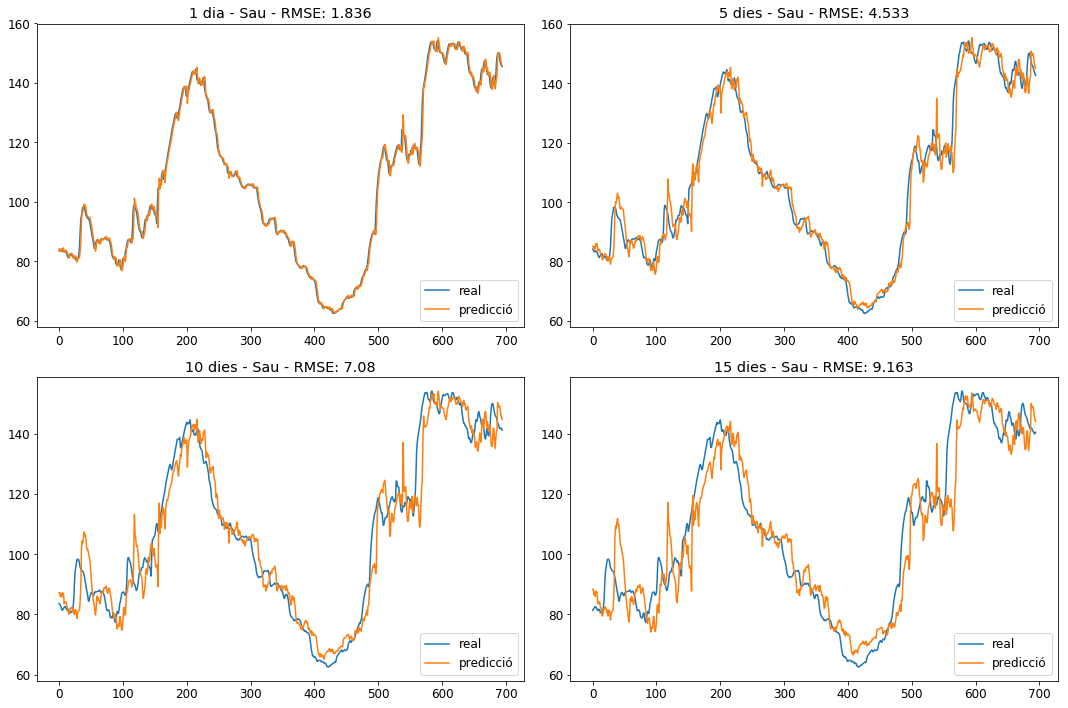

In [41]:
plt.rcParams.update({'font.size': 12})

plt.subplots_adjust(hspace=0.5)

title1 = '1 dia - Sau - RMSE: '+str(round(dies[0],3))
title5 = '5 dies - Sau - RMSE: '+str(round(dies[4],3))
title10 = '10 dies - Sau - RMSE: '+str(round(dies[9],3))
title15 = '15 dies - Sau - RMSE: '+str(round(dies[14],3))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# plot time signal:
axes[0, 0].set_title(title1)
axes[0, 0].plot(test1, label='real')
axes[0, 0].plot(dia1, label='predicció')
axes[0, 0].legend(loc=4)

axes[0, 1].set_title(title5)
axes[0, 1].plot(test5, label='real')
axes[0, 1].plot(dia5, label='predicció')
axes[0, 1].legend(loc=4)

axes[1, 0].set_title(title10)
axes[1, 0].plot(test10, label='real')
axes[1, 0].plot(dia10, label='predicció')
axes[1, 0].legend(loc=4)

axes[1, 1].set_title(title15)
axes[1, 1].plot(test15, label='real')
axes[1, 1].plot(dia15, label='predicció')
axes[1, 1].legend(loc=4)


fig.tight_layout()
plt.show()